In [8]:
import numpy as np
import pandas as pd

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV

data = pd.read_csv("Movie_dataset/ratings_small.csv")
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Surprise Format

In [16]:
reader = Reader(rating_scale=(1, 5))
ratings_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader=reader)

# MAE and RMSE

In [22]:
pmf = SVD()
user_cf = KNNBasic(sim_options={'user_based': True}, verbose=False)
item_cf = KNNBasic(sim_options={'user_based': False}, verbose=False) 
algorithms = [pmf, user_cf, item_cf]
method = ['pmf', 'user_cf', 'item_cf']

for i in range(3):
    algo = algorithms[i]
    name = method[i]
    results = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

    average_mae = sum(results['test_mae']) / 5
    average_rmse = sum(results['test_rmse']) / 5

    print(f"\nResults for {name}:")
    print(f"Average MAE: {average_mae}")
    print(f"Average RMSE: {average_rmse}")
    print('-'*100)


Results for pmf:
Average MAE: 0.6896641665506327
Average RMSE: 0.8963312610396728
----------------------------------------------------------------------------------------------------

Results for user_cf:
Average MAE: 0.7440730529067775
Average RMSE: 0.9671293828986205
----------------------------------------------------------------------------------------------------

Results for item_cf:
Average MAE: 0.7211203576338683
Average RMSE: 0.9352138014864944
----------------------------------------------------------------------------------------------------


# Cosine, MSD (Mean Squared Difference), and Pearson similarities

# Cosine

In [45]:
rmse_user_cf = []
mae_user_cf = []

rmse_item_cf = []
mae_item_cf = []

user_cf_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
item_cf_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False}, verbose=False) 

print('User:')
user_run = cross_validate(eval('user_cf_cosine'), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_user_cf.append(user_run['test_rmse'].mean())
mae_user_cf.append(user_run['test_mae'].mean())
print(f'Cosine RMSE: {rmse_user_cf[0]}')
print(f'Cosine MAE: {mae_user_cf[0]}')

print('Item:')     
item_run = cross_validate(eval('item_cf_cosine'), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_item_cf.append(item_run['test_rmse'].mean())
mae_item_cf.append(item_run['test_mae'].mean())
print(f'Cosine RMSE: {rmse_item_cf[0]}')
print(f'Cosine MAE: {mae_item_cf[0]}')


User:
Cosine RMSE: 0.9933277411082191
Cosine MAE: 0.7671641262073388
Item:
Cosine RMSE: 0.9939476339766122
Cosine MAE: 0.7736802016645136


# MSD

In [46]:
user_cf_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': True}, verbose=False)
item_cf_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': False}, verbose=False) 

print('User:')
user_run = cross_validate(eval('user_cf_msd'), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_user_cf.append(user_run['test_rmse'].mean())
mae_user_cf.append(user_run['test_mae'].mean())
print(f'MSD RMSE: {rmse_user_cf[1]}')
print(f'MSD MAE: {mae_user_cf[1]}')
    
print('Item:')
item_run = cross_validate(eval('item_cf_msd'), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_item_cf.append(item_run['test_rmse'].mean())
mae_item_cf.append(item_run['test_mae'].mean())
print(f'MSD RMSE: {rmse_item_cf[1]}')
print(f'MSD MAE: {mae_item_cf[1]}')

User:
MSD RMSE: 0.9685560171518613
MSD MAE: 0.7443022017667091
Item:
MSD RMSE: 0.9341582867729633
MSD MAE: 0.7206034319793004


# Pearson

In [47]:
user_cf_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
item_cf_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False}, verbose=False) 

print('User:')
user_run = cross_validate(eval('user_cf_pearson'), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_user_cf.append(user_run['test_rmse'].mean())
mae_user_cf.append(user_run['test_mae'].mean())
print(f'Pearson RMSE: {rmse_user_cf[2]}')
print(f'Pearson MAE: {mae_user_cf[2]}')

print('Item:')     
item_run = cross_validate(eval('item_cf_pearson'), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_item_cf.append(item_run['test_rmse'].mean())
mae_item_cf.append(item_run['test_mae'].mean())
print(f'Pearson RMSE: {rmse_item_cf[2]}')
print(f'Pearson MAE: {mae_item_cf[2]}')

User:
Pearson RMSE: 0.9977475034715365
Pearson MAE: 0.7723288054515709
Item:
Pearson RMSE: 0.9914066348086129
Pearson MAE: 0.7694568668749073


# Plot

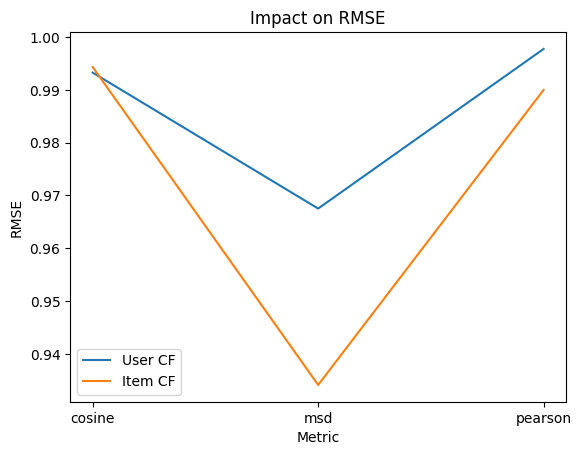

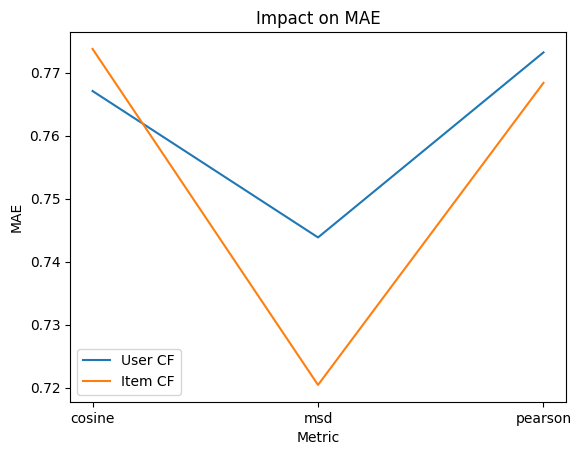

In [44]:
metrics = ['cosine', 'msd', 'pearson']

plt.plot(metrics, rmse_user_cf, label='User CF')
plt.plot(metrics, rmse_item_cf, label='Item CF')
plt.title('Impact on RMSE')
plt.xlabel('Metric')
plt.ylabel('RMSE')
plt.legend()
plt.show()

plt.plot(metrics, mae_user_cf, label='User CF')
plt.plot(metrics, mae_item_cf, label='Item CF')
plt.title('Impact on MAE')
plt.xlabel('Metric')
plt.ylabel('MAE')
plt.legend()
plt.show()

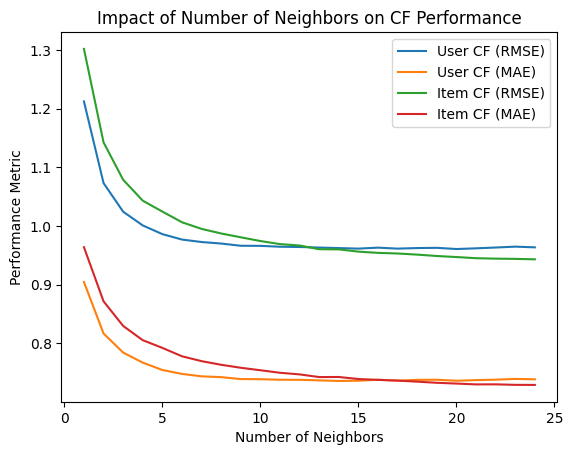

In [50]:
# Set the range of neighbors to test
neighbors_range = list(range(1, 25))

# User-based CF
rmse_user_values = []
mae_user_values = []

for n_neighbors in neighbors_range:
    user_cf = KNNBasic(k=n_neighbors, sim_options={'user_based': True}, verbose=False)
    user_run = cross_validate(user_cf, ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_user_values.append(np.mean(user_run['test_rmse']))
    mae_user_values.append(np.mean(user_run['test_mae']))

# Item-based CF
rmse_item_values = []
mae_item_values = []

for n_neighbors in neighbors_range:
    item_cf = KNNBasic(k=n_neighbors, sim_options={'user_based': False}, verbose=False)
    item_run = cross_validate(item_cf, ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_item_values.append(np.mean(item_run['test_rmse']))
    mae_item_values.append(np.mean(item_run['test_mae']))

# Plotting the results
plt.plot(neighbors_range, rmse_user_values, label='User CF (RMSE)')
plt.plot(neighbors_range, mae_user_values, label='User CF (MAE)')
plt.plot(neighbors_range, rmse_item_values, label='Item CF (RMSE)')
plt.plot(neighbors_range, mae_item_values, label='Item CF (MAE)')

plt.title('Impact of Number of Neighbors on CF Performance')
plt.xlabel('Number of Neighbors')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()

In [52]:
# User-based CF
best_user_k = None
best_user_rmse = float('inf')
neighbors_range = list(range(1, 40))

for n_neighbors in neighbors_range:
    user_cf = KNNBasic(k=n_neighbors, sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
    user_run = cross_validate(user_cf, ratings_data, measures=['RMSE'], cv=5, verbose=False)
    user_rmse = np.mean(user_run['test_rmse'])
    
    if user_rmse < best_user_rmse:
        best_user_rmse = user_rmse
        best_user_k = n_neighbors

# Item-based CF
best_item_k = None
best_item_rmse = float('inf')

for n_neighbors in neighbors_range:
    item_cf = KNNBasic(k=n_neighbors, sim_options={'name': 'cosine', 'user_based': False}, verbose=False)
    item_run = cross_validate(item_cf, ratings_data, measures=['RMSE'], cv=5, verbose=False)
    item_rmse = np.mean(item_run['test_rmse'])
    
    if item_rmse < best_item_rmse:
        best_item_rmse = item_rmse
        best_item_k = n_neighbors

# Output the results
print(f"Best K for User-based CF: {best_user_k}, RMSE: {best_user_rmse}")
print(f"Best K for Item-based CF: {best_item_k}, RMSE: {best_item_rmse}")


Best K for User-based CF: 31, RMSE: 0.9921267280130077
Best K for Item-based CF: 38, RMSE: 0.9958895659882743
